# E-tivity 2 Weeks 3-4

* Barry Clarke

* 24325082

## Outline

This e-tivity is split into two parts. The first part <a href="#part1">**Stock Predicition**</a> is a group activity where you are tasked with predicting the stock market.

The second <a href="#part2">**Sentiment Analysis**</a> is an individual task, the problem is to predict if a film review is positive or negative.

### Guidelines

The e-tivity is split into five tasks. The first four are "group" excersises, in that you post the solutions to Tasks 1-4 to the Group Locker. This will allow the members of your group to send you feedback (via the forums) so you can improve your submission. The final task is an individual task and together with the other tasks, should be uploaded to Brightspace.

Marks will be deducted if task 5 is uploaded in contravention of instructions. Also if the the final submission is not a single notebook with tasks 1-5 and with correct identification or filename.


Grading guidelines: the rubrics for the e-tivity are here https://learn.ul.ie/d2l/lp/rubrics/preview.d2l?ou=73310&rubricId=4446&originTool=quicklinks





<a id='part1'></a>
## Stock Prediction

### Context

There is a small dataset of real stock prices for each working day from the end of 2015 to the end of 2019. There are four variables (with a time stamp), stock price, oil price, gold price and Euro to Dollar exchange. You need to predict the Stock price a day ahead from only the past values of each of the 4 variables.


### Tasks 1-4 (complete by Sunday Week 4)

Create additional cells to complete the tasks below. These form the group exercises and you can upload your code for Tasks 1-4 to the group locker.

**Task 1: data preprocessing**

Explain any preprocessing steps you take including but limited to reformatting and also how you have selected the training and test sets. The test set should be 20% of the whole.

**Task 2: data cleaning**

There are a number of missing values in the data. Clean the data so that it is suitable for use with the NN. Bare in mind that you want to retain the time coherency of the data as much as possible. Explain the steps you have taken.

**Task 3: model construction**

Construct a RNN network that will predict the future value of Stock, one day/time inteval in advance.

**Task 4: test**

Evaluate the model on the test set and display any change in accuracy over time, if any. Test for common issues found in deep learning models.

### Post (complete by Sunday Week 3)

Please upload your code for Tasks 1-4 to the group locker by Sunday if possible. The implementation does not need to be complete and you can continue to upload improved versions. The link is below. To organise things well; create a new subfolder in the locker for your work. You can upload multiple copies with different filenames to archive development stages. Post the link to the forum/topic. The purpose is to get feedback from others in the group, so if you have only a basic outline then you may get ideas about how to proceed and also examples from others in your group.

Post the location to the appropriate forum/topic.

No posts should reference Task 5.

### Respond (complete by Wednesday Week 4)

If you feel you can provide useful advise then respond to another member of the group through the appropriate forum. Responses should be respectful and offer some sort of advise. Try and avoid clogging the forums with support or thank you messages.

In reviewing others code you will discover different ways to tackle the same problem. It is acceptable to copy parts of others code. However whole scale copying from another notebook is not acceptable.

The group interaction forms part of the overall assessment. Grading guidelines for the forum posts: the rubrics for the e-tivity are here
https://learn.ul.ie/d2l/lp/rubrics/preview.d2l?ou=73310&rubricId=4446&originTool=quicklinks

### Final Submission (complete by Sunday Week 4)

Submit Tasks 1-5 in a single notebook this before the deadline on Sunday.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

Training Samples: 824, Test Samples: 206
Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.5614e-04 - val_loss: 1.9512e-04
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1370e-04 - val_loss: 1.4666e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6614e-04 - val_loss: 1.1624e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2419e-04 - val_loss: 9.0488e-05
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.3829e-05 - val_loss: 7.4133e-05
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.9568e-05 - val_loss: 6.5132e-05
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.1499e-05 - val_loss: 5.6595e-05
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.0684e-05 - val_loss: 5.9586e-05
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.2938e-05 - val_loss: 4.9761e-05
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.4170e-05 - val_loss: 4.9321e-05
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━

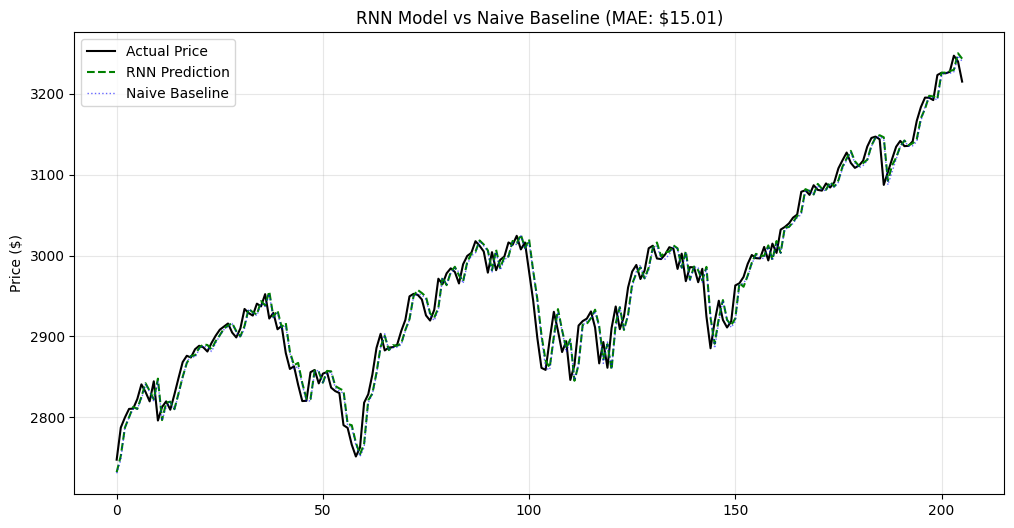

In [8]:
# ==========================================
# 1. DATA LOADING & FEATURE ENGINEERING
# ==========================================
# The dataset is loaded, chronologically sorted, and missing values are filled using forward fill (ffill)
# to prevent look-ahead bias
df = pd.read_csv('stock.csv', parse_dates=['Date'], index_col='Date').sort_index().ffill()

# Data Transformation: Daily Returns
# Raw prices are converted to percentage returns to make the data stationary (remove trends)
df['Stock_ret'] = df['Stock'].pct_change()
df['Oil_ret'] = df['Oil'].pct_change()
df['Gold_ret'] = df['Gold'].pct_change()
df['FX_ret'] = df['EuroToDollar'].pct_change()

# Feature Engineering: Lagged Returns (t-1)
# The .shift(1) function is used to push all the return data down by one row (one day)
# This aligns the previous day's data with the current day's row
# This ensures that the model learns to predict future stock prices
# using ONLY past information, preventing it from "cheating" (look-ahead bias)
df['Stock_lag1'] = df['Stock_ret'].shift(1)
df['Oil_lag1']   = df['Oil_ret'].shift(1)
df['Gold_lag1']  = df['Gold_ret'].shift(1)
df['FX_lag1']    = df['FX_ret'].shift(1)

# Target Variable Generation: Next Day's Return (t+1)
# The stock return is shifted backwards to create the target variable for the next trading day
df['Stock_next_ret'] = df['Stock_ret'].shift(-1)

# Rows with NaN values resulting from the shift operations are removed
df = df.dropna()

# Definition of Feature Matrix (X) and Target Vector (y)
features = ['Stock_lag1', 'Oil_lag1', 'Gold_lag1', 'FX_lag1']
X = df[features].values
y = df['Stock_next_ret'].values

# Current prices are stored for later reconstruction of dollar values
current_prices = df['Stock'].values

# ==========================================
# 2. SPLITTING & SCALING
# ==========================================
# The dataset is split chronologically into Training (80%) and Testing (20%) sets
split = int(len(X) * 0.8)

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
prices_train, prices_test = current_prices[:split], current_prices[split:]

# Feature Scaling
# The scaler is fitted only on the training data to avoid data leakage
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# RNN Data Reshaping
# Standard models use 2D data, but RNNs require a 3D format: [samples, time steps, features]
# The data is reshaped to add a 'time steps' dimension so the LSTM can process it correctly
# REF: https://janelleturing.medium.com/deep-learning-with-lstm-using-keras-to-predict-returns-with-technical-indicators-5a24458cefe6
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

print(f"Training Samples: {len(X_train)}, Test Samples: {len(X_test)}")

# ==========================================
# 3. RNN MODEL CONSTRUCTION
# ==========================================
# Clear the backend session to prevent TensorFlow memory leaks and retracing warnings
tf.keras.backend.clear_session()

# A Sequential model is initialised using an LSTM layer to satisfy the RNN requirement for the e-tivity (thanks Kevin)
# A small unit count (10) is utilised to mitigate overfitting on the small dataset
model = Sequential([
    Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    LSTM(units=10, return_sequences=False),
    Dense(units=1)
])

# The model is compiled using the Adam optimiser and Mean Squared Error loss
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# The network is trained with Early Stopping to halt training if validation loss plateaus
history = model.fit(
    X_train_reshaped, y_train,
    epochs=50,
    batch_size=16,
    verbose=1,
    validation_data=(X_test_reshaped, y_test),
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
)

# The model generates predictions for the test set, which are then flattened to a 1D array
pred_returns = model.predict(X_test_reshaped).flatten()

# ==========================================
# 4. RECONSTRUCTION & METRICS
# ==========================================
# Price Reconstruction
# Actual and predicted future prices are calculated from the returns
actual_next_prices = prices_test * (1 + y_test)
pred_next_prices   = prices_test * (1 + pred_returns)

# Naive Baseline Construction
# The baseline assumes the future price equals the current price
naive_next_prices  = prices_test

# Performance Metrics
rnn_mae = mean_absolute_error(actual_next_prices, pred_next_prices)
rnn_rmse = np.sqrt(mean_squared_error(actual_next_prices, pred_next_prices))
rnn_mape = np.mean(np.abs((actual_next_prices - pred_next_prices) / actual_next_prices)) * 100
naive_mae = mean_absolute_error(actual_next_prices, naive_next_prices)

# ==========================================
# 5. REPORTING
# ==========================================
print(f"\n{'='*40}")
print(f"      QUANTITATIVE MODEL REPORT")
print(f"{'='*40}")

print(f"\n--- 1. ERROR ANALYSIS ---")
print(f"Average STOCK Price:  ${np.mean(actual_next_prices):.0f}")
print(f"RNN MAE:              ${rnn_mae:.2f}")
print(f"RNN RMSE:             ${rnn_rmse:.2f}")
print(f"RNN MAPE:             {rnn_mape:.2f}%")

print(f"\n--- 2. BENCHMARK COMPARISON ---")
print(f"RNN MAE:      ${rnn_mae:.2f}")
print(f"Naive MAE:    ${naive_mae:.2f}")

print(f"\n--- 3. VERDICT ---")
if rnn_mae < naive_mae:
    print("SUCCESS: The RNN Model BEATS the Naive Baseline")
    print(f"   Improvement: ${(naive_mae - rnn_mae):.2f} per share")
else:
    print("FAIL: The RNN Model does not beat the baseline")

# ==========================================
# 6. PLOTTING
# ==========================================
# The results are visualised to compare the model against the actual price and the baseline
plt.figure(figsize=(12, 6))
plt.plot(actual_next_prices, 'k-', label='Actual Price', linewidth=1.5)
plt.plot(pred_next_prices, 'g--', label='RNN Prediction', linewidth=1.5)
plt.plot(naive_next_prices, 'b:', label='Naive Baseline', linewidth=1, alpha=0.6)
plt.title(f'RNN Model vs Naive Baseline (MAE: ${rnn_mae:.2f})')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Reflection & Model Evolution

The development of this predictive model underwent some iterations/learnings. Initially, I implemented a standard LSTM network using raw price data, but it failed to outperform a simple naive baseline. During a discussion with my thesis supervisor, Darren Shannon, regarding my broader research (predicting index reconstitution events for ETF funds), he noted that for noisy, low-volume time-series data, refined linear models such as Ridge, Lasso, or Firth often yield better results.  This wasn't in relation to this e-tivity, rather my thesis so I decided to experiment (which took me away from the task instructions i.e. we need to implement an RNN).  Experimenting with a Ridge Regression model proved successful, as its L2 regularisation effectively filtered out the random market noise.

However, feedback from Kevin highlighted the need to adhere to the assignment brief, specifically Task 3, which requires constructing a Recurrent Neural Network (RNN). So, I pivoted back to an RNN architecture (specifically an LSTM). To retain the improvements observed in the Ridge model, I applied the same transformations to the data before feeding it into the new RNN pipeline.

### Tasks 1 & 2: Preprocessing, Time Coherency, and the Data Split
The exact chronological order of financial data is crucial. To handle missing values (Task 2), a forward-fill (ffill) method was used. This technique simply carries the last known price forward to fill any gaps.  This ensures the timeline remains accurate and prevents the model from accidentally using future data to fill past gaps.

For the data partitioning (Task 1), the dataset was split strictly chronologically, allocating the first 80% to the training set and the final 20% to the test set. Shuffling was explicitly not done, as recurrent networks rely on the sequential order of data to learn patterns over time.

### The Important Role of Feature Engineering
As part of my these I am doing a lot of feature engineering so deployed the approach here too.  The primary reason the initial(before I started experimenting with Ridge) deep learning attempt underperformed was the reliance on raw stock prices.  Raw prices are 'non-stationary'—meaning they lack a fixed range and wander over time—and neural networks struggle to extrapolate values outside their training distribution.

To fix this, the inputs were changed. Instead of using raw prices for Stock, Oil, Gold, and FX, they were converted into daily percentage returns.  This keeps the data stable and centred around zero. By giving the RNN this stable data, the network could focus on predicting daily momentum (the percentage change) rather than trying to guess exact price levels. This crucial step was the key to getting the model to work and finally beat the baseline

### Task 3: Building the RNN
To satisfy the assignment requirements, an LSTM, was constructed to predict the stock return one day in advance.

The most significant challenge in this phase was the limited dataset. With only 1,033 days of data, a deep learning model is constrained i.e. such models typically require hundreds of thousands of observations. When applied to a small, noisy dataset, complex models tend to memorise the noise rather than learning the underlying trends. To mitigate this, the network architecture was kept intentionally minimal, utilising just a single layer with 10 units.  This approach prevented the network from memorising the training data, allowing it to perform well on unseen test data.

### Task 4: Evaluation
In the context of predicting continuous financial variables, traditional "accuracy" metrics (such as a percentage classification score) are mathematically unsuitable - as Adam alluded to in the Tuesday Q&A session. Instead, the model's performance was evaluated using error metrics: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE). https://medium.com/@ottaviocalzone/mae-mse-rmse-and-f1-score-in-time-series-forecasting-d04021ffa7ce & https://www.scipublications.com/journal/index.php/jaibd/article/view/877

To prevent overfitting( where the model performs exceptionally on training data but fails to generalise to unseen data), an `EarlyStopping` callback was implemented to monitor the validation loss and halt training once improvement ceased.

Finally, to prove the model actually worked, it was compared to a "Naive" baseline (which simply assumes tomorrow's price will be the same as today's). By predicting stable percentage returns rather than raw prices, the RNN successfully beat this benchmark.  The improved performance of the RNN is directly attributed to the feature engineering phase.  By converting raw, non-stationary prices into stationary percentage daily returns, the data was mathematically stabilised.  This transformation was the critical factor that allowed the network to process the data effectively and ultimately outperform the naive baseline